# Data Preprocessing

In [ ]:
# Install PyMuPDF
!pip install PyMuPDF

In [ ]:
pip install pypdf

In [ ]:
# Code to mount Google Drive in Colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Define the paths
pdf_path = "PRM.pdf"  # Path to the PDF file
output_text_path = "/content/drive/MyDrive/converted_text.txt"  # Path to save the text file in Google Drive

In [ ]:
import pandas as pd

In [ ]:
cd '/content/drive/MyDrive/IA&Cog/PRM'

/content/drive/MyDrive/IA&Cog/PRM


In [ ]:
#import PyPDF2
# importing required modules
from pypdf import PdfReader

# creating a pdf reader object
reader = PdfReader('PRM.pdf')

# printing number of pages in pdf file
print(len(reader.pages))

# getting a specific page from the pdf file
page = reader.pages[4]

# extracting text from page
text = page.extract_text()

128


In [ ]:
# printing number of pages in pdf file
print(f"Total number of pages: {len(reader.pages)}")

# extracting text from pages 4 to 6 (indexing starts from 0, so pages 4-6 are indices 3-5)
Text =''
for page_num in range(3, 8):
    page = reader.pages[page_num]
    text = page.extract_text()
    Text += text

Total number of pages: 128


In [ ]:
text = Text

## Detailing Chapters

In [ ]:
# @title
contentChapter1 = ""
contentChapter2 = ""
contentChapter3 = ""
contentChapter4 = ""
contentChapter5 = ""
contentChapter6 = ""
contentChapter7 = ""
contentChapter8 = ""
contentChapter9 = ""

# extracting text from pages 13 to 19 (index 12 to 18)
for i in range(12, 19):
    page = reader.pages[i]
    contentChapter1 += page.extract_text() + "\n"
# extracting text from pages 21 to 24 (index 20 to 23)
for i in range(20, 24):
    page = reader.pages[i]
    contentChapter2 += page.extract_text() + "\n"

# extracting text from pages 25 to 29 (index 24 to 28)
for i in range(24, 29):
    page = reader.pages[i]
    contentChapter3 += page.extract_text() + "\n"

# extracting text from pages 31 to 35 (index 30 to 34)
for i in range(30, 35):
    page = reader.pages[i]
    contentChapter4 += page.extract_text() + "\n"

# extracting text from pages 37 to 41 (index 36 to 40)
for i in range(36, 41):
    page = reader.pages[i]
    contentChapter5 += page.extract_text() + "\n"

# extracting text from pages 43 to 47 (index 42 to 46)
for i in range(42, 47):
    page = reader.pages[i]
    contentChapter6 += page.extract_text() + "\n"

# extracting text from pages 49 to 54 (index 48 to 53)
for i in range(48, 54):
    page = reader.pages[i]
    contentChapter7 += page.extract_text() + "\n"

# extracting text from pages 55 to 62 (index 54 to 61)
for i in range(54, 62):
    page = reader.pages[i]
    contentChapter8 += page.extract_text() + "\n"

# extracting text from pages 63 to 67 (index 62 to 66)
for i in range(62, 67):
    page = reader.pages[i]
    contentChapter9 += page.extract_text() + "\n"

In [ ]:
import re
import pandas as pd

In [ ]:
def clean_chapter_text(text):
    # Remove repetitive copyright strings
    text = re.sub(r'\s*\d+\s*\©?2009 Project Management Institute\. Practice Standard for Project Risk Management\d*', '', text)

    # Remove figure announcements
    text = re.sub(r'Figure \d+-\d+\. .*?\n', '', text)

    # Remove chapter reannouncements like 'CHAPTER 1 - INTRODUCTION'
    text = re.sub(r'CHAPTER \d+\s*[-–—]?\s*\w+.*?\n', '', text)

    # Remove chapter header 'CHAPTER 1' type lines
    text = re.sub(r'CHAPTER \d+\n', '', text)

    # Remove chapter announcements like 'CHAPTER 1'
    text = re.sub(r'CHAPTER \d+.*?\n', '', text)

    # Remove other forms of line with the word 'INTRODUCTION'
    text = re.sub(r'\s*INTRODUCTION\s*', '', text)

    # Remove special characters and clean extra spaces
    text = re.sub(r'[^\x00-\x7F]+', ' ', text)  # Remove non-ASCII characters
    text = re.sub(r'\s+', ' ', text).strip()  # Clean extra spaces

    # Split the text into subsections based on numbering patterns
    subsections = re.split(r'(\d+\.\d+\s+.*?)(?=\s\d+\.\d+\s+|$)', text)

    # Remove empty strings and leading/trailing spaces
    subsections = [section.strip() for section in subsections if section.strip() != '']

    return subsections

def create_dataset(text):
    # Clean the text and split into subsections
    sections = clean_chapter_text(text)

    # Extract the introduction (description) and subsections
    introduction = sections[0] if sections else ''
    subsections = sections[1:]

    # Create a dataset with the introduction and subsections
    data = {
        'Section': ['Introduction'] + [f'Subsection {i+1}' for i in range(len(subsections))],
        'Content': [introduction] + subsections
    }

    # Convert to DataFrame
    df = pd.DataFrame(data)

    # Remove rows where 'Content' length is 80 characters or less
    df = df[df['Content'].str.len() > 80].reset_index(drop=True)

    # Update 'Section' numerotation after filtering
    df['Section'] = ['Introduction'] + [f'Subsection {i+1}' for i in range(1, len(df))]

    # Remove numbers from 'Content' column
    df['Content'] = df['Content'].apply(lambda x: re.sub(r'\d+', '', x))

    # Remove periods when they are the first character in the 'Content' column
    df['Content'] = df['Content'].apply(lambda x: re.sub(r'^\.', '', x).strip())

    # Predefined list of titles to remove if they are the first thing in the 'Content' column
    titles_only_list = ['INTRODUCTION', 'SUMMARY', 'CONCLUSION']
    df['Content'] = df['Content'].apply(lambda x: re.sub(r'^(' + '|'.join(titles_only_list) + r')\s+', '', x, count=1).strip() if x.upper().startswith(tuple(t.upper() for t in titles_only_list)) else x)

    # Split 'Content' into sentences using periods as separators
#   df = df.explode('Content')
#    df['Sentence'] = df['Content'].apply(lambda x: [s.strip() for s in re.split(r'(?<=\.)\s+', x) if s.strip()])
#    df = df.explode('Sentence').reset_index(drop=True)

    return df

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [ ]:
# Example usage
dataset = create_dataset(contentChapter1+contentChapter2+contentChapter3+contentChapter4+contentChapter5+contentChapter6+contentChapter7+contentChapter8+contentChapter9)
dataset


,Section,Content
0,Introduction,"Project Management Institute (PMI) practice standards are guides to the use of a tool, technique, or process identi ed in A Guide to the Project Management Body of Knowledge ( PMBOK Guide Fourth Edition) or other PMI standards. Practice standards are targeted at audiences who participate in the management of projects. This includes project managers, project personnel, contract personnel, supervisors, and other project stakeholders. A PMI practice standard describes processes, activities, inputs, and outputs for a speci c Knowledge Area. It provides information on what the signi cant process, tool, or technique is, what it does, why it is signi cant, when it should be performed or executed, and, if necessary for further clari cation, who should perform the process. A practice standard does not prescribe how the process is to be implemented, leaving that subject for other forums such as handbooks, manuals, and courses. This chapter includes the following sections:"
1,Subsection 2,"Purpose of the Practice Standard for Project Risk Management The purpose of the Practice Standard for Project Risk Management is to ( a ) provide a standard for project management practitioners and other stakeholders that de nes the aspects of Project Risk Management that are recognized as good practice on most projects most of the time and ( b ) provide a standard that is globally applicable and consistently applied. This practice standard has a descriptive purpose rather than one used for training or educational purposes. The Practice Standard for Project Risk Management covers risk management as it is applied to single projects only. Like the PMBOK Guide Fourth Edition, this practice standard does not cover risk in programs or portfolios of projects. Chapter of the PMBOK Guide Fourth Edition, is the basis for the Practice Standard for Project Risk Management . This practice standard is consistent with that chapter, emphasizing the concepts and principles relating to Project Risk Management. It is aligned with other PMI practice standards. Figure - compares the purposes of this practice standard to those of the PMBOK Guide Fourth Edition and textbooks, handbooks, and courses. This practice standard is organized in three main sections: . Introductory material including the framework, purpose, principles, context of, and introduction to Project Risk Management processes as de ned in the PMBOK Guide Fourth Edition. . Principles underlying the six Project Risk Management processes in the PMBOK Guide Fourth Edition. The six processes are as follows: Plan Risk Management, Identify Risks, Perform Qualitative Risk Analysis, Perform Quantitative Risk Analysis, Plan Risk Responses, and Monitor and Control Risks. Each of these six processes is described in a chapter that addresses the following four topics: ( a ) purpose and objectives of the process; ( b ) critical success factors for the process; ( c ) tools and techniques for the process; and ( d ) documenting the results of the process. . A glossary of terms which are used in this practice standard. This practice standard emphasizes those principles that are fundamental to effective, comprehensive, and successful Project Risk Management. These principles can and should be stated at a general level for several reasons: . Principles are expected to be agreed upon now and to be valid in the future. While tools and techniques are constantly evolving, the principles have more stability and persistence. . Different projects, organizations, and situations will require different approaches to Project Risk Management. In particular, risk management is a discipline that contains a series of processes to apply to both large and small projects. Risk management will be more effective if its practice is tailored to the project and congruent with the organizational culture, processes and assets. There are many different ways of conducting risk management that may comply with the principles

## Entity Coreference Resolution

In [ ]:
import spacy

# Load the SpaCy model
nlp = spacy.load("en_core_web_sm")

# Input text
TrialText = "John said he would visit his grandmother. He also mentioned that she lives in New York."

# Process the text using the SpaCy model
doc = nlp(TrialText)

# Manual coreference resolution
resolved_tokens = []
pronoun_mapping = {}
current_subject = None

for token in doc:
    # Update current subject for coreference resolution
    if token.pos_ == "PROPN" or (token.pos_ == "NOUN" and token.dep_ == "nsubj"):
        current_subject = token.text

    # Map pronouns to their antecedents (basic heuristic approach)
    if token.pos_ == "PRON":
        if token.text.lower() in ["he", "she", "it"] and current_subject:
            resolved_tokens.append(current_subject)
        elif token.text.lower() in ["his", "her"] and current_subject:
            resolved_tokens.append(current_subject + "'s")
        else:
            resolved_tokens.append(token.text)
    else:
        resolved_tokens.append(token.text)

# Output the resolved text
resolved_text = " ".join(resolved_tokens)
print("\nResolved text:")
print(resolved_text)


/usr/local/lib/python3.10/dist-packages/spacy/util.py:1740: UserWarning: [W111] Jupyter notebook detected: if using `prefer_gpu()` or `require_gpu()`, include it in the same cell right before `spacy.load()` to ensure that the model is loaded on the correct device. More information: http://spacy.io/usage/v3#jupyter-notebook-gpu
  warnings.warn(Warnings.W111)



Resolved text:
John said John would visit John's grandmother . John also mentioned that John lives in New York .


In [ ]:
def resolve_coreferences(text):
    doc = nlp(text)
    resolved_tokens = []
    pronoun_mapping = {}
    current_subject = None

    for token in doc:
        # Update current subject for coreference resolution
        if token.pos_ == "PROPN" or (token.pos_ == "NOUN" and token.dep_ == "nsubj"):
            current_subject = token.text

        # Map pronouns to their antecedents (basic heuristic approach)
        if token.pos_ == "PRON":
            if token.text.lower() in ["he", "she", "it", "they", "them"] and current_subject:
                resolved_tokens.append(current_subject)
            elif token.text.lower() in ["his", "her", "its", "their"] and current_subject:
                resolved_tokens.append(current_subject + "'s")
            else:
                resolved_tokens.append(token.text)
        elif token.text.lower() in ["that", "this", "who", "what"] and current_subject:
            resolved_tokens.append(current_subject)
        else:
            resolved_tokens.append(token.text)

    return " ".join(resolved_tokens)

In [ ]:
# Apply the function to each row of the 'Content' column
dataset['Resolved_Content'] = dataset['Content'].apply(resolve_coreferences)
dataset.head()

,Section,Content,Resolved_Content
0,Introduction,"Project Management Institute (PMI) practice standards are guides to the use of a tool, technique, or process identi ed in A Guide to the Project Management Body of Knowledge ( PMBOK Guide Fourth Edition) or other PMI standards. Practice standards are targeted at audiences who participate in the management of projects. This includes project managers, project personnel, contract personnel, supervisors, and other project stakeholders. A PMI practice standard describes processes, activities, inputs, and outputs for a speci c Knowledge Area. It provides information on what the signi cant process, tool, or technique is, what it does, why it is signi cant, when it should be performed or executed, and, if necessary for further clari cation, who should perform the process. A practice standard does not prescribe how the process is to be implemented, leaving that subject for other forums such as handbooks, manuals, and courses. This chapter includes the following sections:","Project Management Institute ( PMI ) practice standards are guides to the use of a tool , technique , or process identi ed in A Guide to the Project Management Body of Knowledge ( PMBOK Guide Fourth Edition ) or other PMI standards . Practice standards are targeted at audiences who participate in the management of projects . This includes project managers , project personnel , contract personnel , supervisors , and other project stakeholders . A PMI practice standard describes processes , activities , inputs , and outputs for a speci c Knowledge Area . Area provides information on what the signi ca nt process , tool , or technique is , what signi does , why signi is signi ca nt , when signi should be performed or executed , and , if necessary for further clari cation , who should perform the process . A practice standard does not prescribe how the process is to be implemented , leaving process subject for other forums such as handbooks , manuals , and courses . process chapter includes the following sections :"
1,Subsection 2,"Purpose of the Practice Standard for Project Risk Management The purpose of the Practice Standard for Project Risk Management is to ( a ) provide a standard for project management practitioners and other stakeholders that de nes the aspects of Project Risk Management that are recognized as good practice on most projects most of the time and ( b ) provide a standard that is globally applicable and consistently applied. This practice standard has a descriptive purpose rather than one used for training or educational purposes. The Practice Standard for Project Risk Management covers risk management as it is applied to single projects only. Like the PMBOK Guide Fourth Edition, this practice standard does not cover risk in programs or portfolios of projects. Chapter of the PMBOK Guide Fourth Edition, is the basis for the Practice Standard for Project Risk Management . This practice standard is consistent with that chapter, emphasizing the concepts and principles relating to Project Risk Management. It is aligned with other PMI practice standards. Figure - compares the purposes of this practice standard to those of the PMBOK Guide Fourth Edition and textbooks, handbooks, and courses. This practice standard is organized in three main sections: . Introductory material including the framework, purpose, principles, context of, and introduction to Project Risk Management processes as de ned in the PMBOK Guide Fourth Edition. . Principles underlying the six Project Risk Management processes in the PMBOK Guide Fourth Edition. The six processes are as follows: Plan Risk Management, Identify Risks, Perform Qualitative Risk Analysis, Perform Quantitative Risk Analysis, Plan Risk Responses, and Monitor and Control Risks. Each of these six processes is described in a chapter that addresses the following four topics: ( a ) purpose and objectives of the process; ( b ) critical success factors for the process; ( c )

## Triplets extraction

In [ ]:
!pip install nlp

In [ ]:
# Load the language model
nlp = spacy.load("en_core_web_sm")

# Function to extract triplets from a given text
def extract_triplets(text):
    doc = nlp(text)
    triplets = []

    for sent in doc.sents:
        subject = None
        predicate = None
        object_ = None

        for token in sent:
            # Check if the token is a verb to identify the predicate
            if token.pos_ == "VERB":
                predicate = token.lemma_

                # Find subject and object connected to the verb
                for child in token.children:
                    if child.dep_ in ("nsubj", "nsubjpass"):
                        subject = child.text
                    if child.dep_ in ("dobj", "pobj", "attr"):
                        object_ = child.text

                if subject and predicate and object_:
                    # Append the triplet
                    triplets.append((subject, predicate, object_))

    return triplets

# Apply the function to the 'content' column and create a new 'triplets' column
dataset['Triplets'] = dataset['Resolved_Content'].apply(extract_triplets)

# Print the updated DataFrame
dataset.head()

/usr/local/lib/python3.10/dist-packages/spacy/util.py:1740: UserWarning: [W111] Jupyter notebook detected: if using `prefer_gpu()` or `require_gpu()`, include it in the same cell right before `spacy.load()` to ensure that the model is loaded on the correct device. More information: http://spacy.io/usage/v3#jupyter-notebook-gpu
  warnings.warn(Warnings.W111)


,Section,Content,Resolved_Content,Triplets
0,Introduction,"Project Management Institute (PMI) practice standards are guides to the use of a tool, technique, or process identi ed in A Guide to the Project Management Body of Knowledge ( PMBOK Guide Fourth Edition) or other PMI standards. Practice standards are targeted at audiences who participate in the management of projects. This includes project managers, project personnel, contract personnel, supervisors, and other project stakeholders. A PMI practice standard describes processes, activities, inputs, and outputs for a speci c Knowledge Area. It provides information on what the signi cant process, tool, or technique is, what it does, why it is signi cant, when it should be performed or executed, and, if necessary for further clari cation, who should perform the process. A practice standard does not prescribe how the process is to be implemented, leaving that subject for other forums such as handbooks, manuals, and courses. This chapter includes the following sections:","Project Management Institute ( PMI ) practice standards are guides to the use of a tool , technique , or process identi ed in A Guide to the Project Management Body of Knowledge ( PMBOK Guide Fourth Edition ) or other PMI standards . Practice standards are targeted at audiences who participate in the management of projects . This includes project managers , project personnel , contract personnel , supervisors , and other project stakeholders . A PMI practice standard describes processes , activities , inputs , and outputs for a speci c Knowledge Area . Area provides information on what the signi ca nt process , tool , or technique is , what signi does , why signi is signi ca nt , when signi should be performed or executed , and , if necessary for further clari cation , who should perform the process . A practice standard does not prescribe how the process is to be implemented , leaving process subject for other forums such as handbooks , manuals , and courses . process chapter includes the following sections :","[(This, include, managers), (Area, provide, information), (signi, process, what), (signi, do, what), (signi, perform, what), (signi, execute, what), (who, perform, process), (standard, leave, subject), (chapter, include, sections), (chapter, follow, sections)]"
1,Subsection 2,"Purpose of the Practice Standard for Project Risk Management The purpose of the Practice Standard for Project Risk Management is to ( a ) provide a standard for project management practitioners and other stakeholders that de nes the aspects of Project Risk Management that are recognized as good practice on most projects most of the time and ( b ) provide a standard that is globally applicable and consistently applied. This practice standard has a descriptive purpose rather than one used for training or educational purposes. The Practice Standard for Project Risk Management covers risk management as it is applied to single projects only. Like the PMBOK Guide Fourth Edition, this practice standard does not cover risk in programs or portfolios of projects. Chapter of the PMBOK Guide Fourth Edition, is the basis for the Practice Standard for Project Risk Management . This practice standard is consistent with that chapter, emphasizing the concepts and principles relating to Project Risk Management. It is aligned with other PMI practice standards. Figure - compares the purposes of this practice standard to those of the PMBOK Guide Fourth Edition and textbooks, handbooks, and courses. This practice standard is organized in three main sections: . Introductory material including the framework, purpose, principles, context of, and introduction to Project Risk Management processes as de ned in the PMBOK Guide Fourth Edition. . Principles underlying the six Project Risk Management processes in the PMBOK Guide Fourth Edition. The six processes are as follows: Plan Risk Management, Identify Risks, Perform Qualitative Risk Analysis, Perform Qu

In [ ]:
!pip install ace_tools

In [ ]:
# Define the words to be removed (in lowercase for case-insensitive comparison)
words_to_remove = {'this', 'who', 'what', 'that', 'chapter'}

def filter_triplets_list(triplets):
    filtered_triplets = []

    for triplet in triplets:
        triplet_parts = tuple(part.strip().lower() for part in triplet)
        # Check if any unwanted words are present or if the same word appears more than once in the triplet
        if any(word in words_to_remove for word in triplet_parts) or len(set(triplet_parts)) < len(triplet_parts):
            continue
        filtered_triplets.append(triplet_parts)

    return filtered_triplets

# Apply the function to the 'Triplets' column
dataset['Triplets'] = dataset['Triplets'].apply(filter_triplets_list)

# Display the updated dataset
dataset.head()


,Section,Content,Resolved_Content,Triplets
0,Introduction,"Project Management Institute (PMI) practice standards are guides to the use of a tool, technique, or process identi ed in A Guide to the Project Management Body of Knowledge ( PMBOK Guide Fourth Edition) or other PMI standards. Practice standards are targeted at audiences who participate in the management of projects. This includes project managers, project personnel, contract personnel, supervisors, and other project stakeholders. A PMI practice standard describes processes, activities, inputs, and outputs for a speci c Knowledge Area. It provides information on what the signi cant process, tool, or technique is, what it does, why it is signi cant, when it should be performed or executed, and, if necessary for further clari cation, who should perform the process. A practice standard does not prescribe how the process is to be implemented, leaving that subject for other forums such as handbooks, manuals, and courses. This chapter includes the following sections:","Project Management Institute ( PMI ) practice standards are guides to the use of a tool , technique , or process identi ed in A Guide to the Project Management Body of Knowledge ( PMBOK Guide Fourth Edition ) or other PMI standards . Practice standards are targeted at audiences who participate in the management of projects . This includes project managers , project personnel , contract personnel , supervisors , and other project stakeholders . A PMI practice standard describes processes , activities , inputs , and outputs for a speci c Knowledge Area . Area provides information on what the signi ca nt process , tool , or technique is , what signi does , why signi is signi ca nt , when signi should be performed or executed , and , if necessary for further clari cation , who should perform the process . A practice standard does not prescribe how the process is to be implemented , leaving process subject for other forums such as handbooks , manuals , and courses . process chapter includes the following sections :","[(area, provide, information), (standard, leave, subject)]"
1,Subsection 2,"Purpose of the Practice Standard for Project Risk Management The purpose of the Practice Standard for Project Risk Management is to ( a ) provide a standard for project management practitioners and other stakeholders that de nes the aspects of Project Risk Management that are recognized as good practice on most projects most of the time and ( b ) provide a standard that is globally applicable and consistently applied. This practice standard has a descriptive purpose rather than one used for training or educational purposes. The Practice Standard for Project Risk Management covers risk management as it is applied to single projects only. Like the PMBOK Guide Fourth Edition, this practice standard does not cover risk in programs or portfolios of projects. Chapter of the PMBOK Guide Fourth Edition, is the basis for the Practice Standard for Project Risk Management . This practice standard is consistent with that chapter, emphasizing the concepts and principles relating to Project Risk Management. It is aligned with other PMI practice standards. Figure - compares the purposes of this practice standard to those of the PMBOK Guide Fourth Edition and textbooks, handbooks, and courses. This practice standard is organized in three main sections: . Introductory material including the framework, purpose, principles, context of, and introduction to Project Risk Management processes as de ned in the PMBOK Guide Fourth Edition. . Principles underlying the six Project Risk Management processes in the PMBOK Guide Fourth Edition. The six processes are as follows: Plan Risk Management, Identify Risks, Perform Qualitative Risk Analysis, Perform Quantitative Risk Analysis, Plan Risk Responses, and Monitor and Control Risks. Each of these six processes is described in a chapter that addresses the following four topics: ( a ) purpose and objectives

# Graph Building

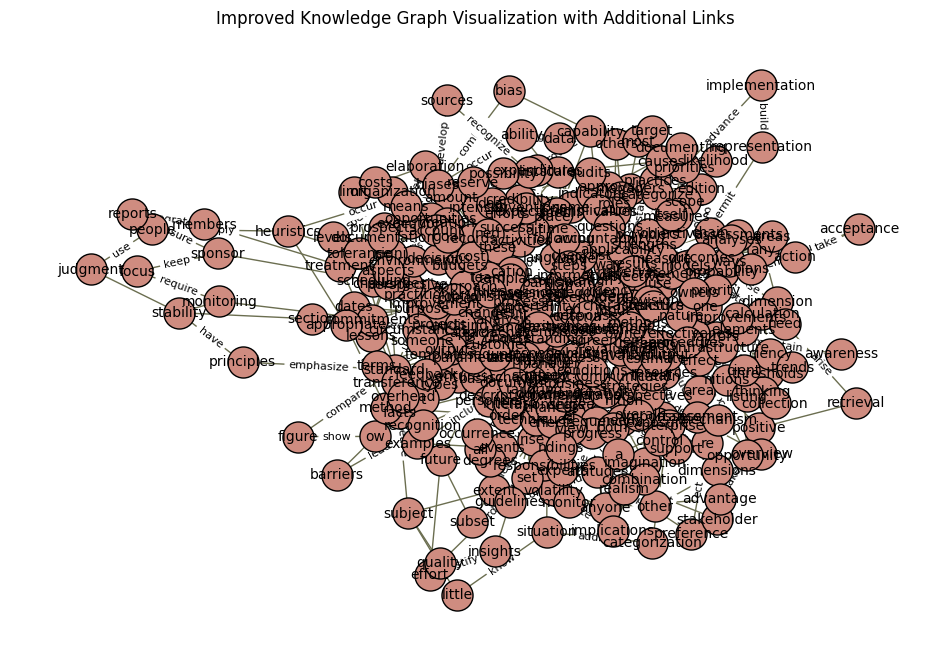

In [ ]:
import random
import networkx as nx
import matplotlib.pyplot as plt

# Initialize an empty graph
G = nx.Graph()

# Add nodes and edges from the 'Triplets' column
for triplets in dataset['Triplets']:
    for triplet in triplets:
        if len(triplet) == 3:
            # Unpack triplet: (node_a, edge_label, node_b)
            node_a, edge_label, node_b = triplet
            # Add nodes and edges with edge attribute 'relationship'
            G.add_edge(node_a, node_b, relationship=edge_label)


all_nodes = list(G.nodes)
for node in all_nodes:
    if G.degree(node) < 2:  # Consider nodes with degree less than 2
        random_nodes = random.sample([n for n in all_nodes if n != node], 3)  # Increase the number of connections
        for target_node in random_nodes:
            if not G.has_edge(node, target_node):
                G.add_edge(node, target_node, relationship="")

# Draw the graph
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, seed=42)  # Position nodes using the spring layout algorithm
edge_labels = nx.get_edge_attributes(G, 'relationship')

# Draw nodes, edges, and edge labels
nx.draw_networkx_nodes(G, pos, node_size=500, node_color='#cf8c80', edgecolors='black')
nx.draw_networkx_edges(G, pos, edge_color='#6b6e50')
nx.draw_networkx_labels(G, pos, font_size=10, font_family='sans-serif')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8, label_pos=0.5)

plt.title('Improved Knowledge Graph Visualization with Additional Links')
plt.axis('off')
plt.show()


# RAG- definitions

In [ ]:
cd '/content/drive/MyDrive/IA&Cog'

/content/drive/MyDrive/IA&Cog


In [ ]:
# Step 2: Specify the path to the text file in your Google Drive
file_path = 'Glossaries.txt'

# Step 3: Open the file and read its content into a variable
with open(file_path, 'r') as file:
    Text = file.read()

# Step 4: Print the content or use it as needed
print(Text[:410])

Assumptions.  Assumptions are factors that, for planning purposes, are considered to be true, real, or 
certain without proof or demonstration. Assumptions affect all aspects of project planning and are part of the 
progressive elaboration of the project. Project teams frequently identify, document, and validate assumptions 
as part of their planning process. Assumptions generally involve a degree of risk. 


In [ ]:
import re
# Split the text into chunks using regex to identify word-definition pairs
pattern = r"([A-Za-z()\s]+)\.\s(.+?)(?=\n[A-Z]|$)"
matches = re.findall(pattern, Text, re.DOTALL)

# Create list of word-definition strings
chunks = [term.strip() + ": " + definition.strip().replace('\n', ' ') for term, definition in matches]

# Print the chunks
for chunk in chunks:
    print(chunk)

Assumptions: Assumptions are factors that, for planning purposes, are considered to be true, real, or  certain without proof or demonstration. Assumptions affect all aspects of project planning and are part of the  progressive elaboration of the project. Project teams frequently identify, document, and validate assumptions  as part of their planning process. Assumptions generally involve a degree of risk.   Beneﬁ t.  Positive effect on a project objective arising from the occurrence of an opportunity.   Bias.  During information gathering about risk, the source of information exhibits a preference or an inclination  that inhibits impartial judgment. Types of bias which commonly affect the risk process include cognitive and  motivational bias.   Cause. Events or circumstances which currently exist and which might give rise to risks.   Consequence. See  impact .   Constraint.  The state, quality, or sense of being restricted to a given course of action or inaction. An applicable  restric

In [ ]:
len(chunks)

357

### Importations

In [ ]:
!pip install sentence-transformers
!pip install langchain_community

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 48.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 409.3/409.3 kB 27.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 64.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 2.5 MB/s eta 0:00:00
  Attempting uninstall: SQLAlchemy
    Found existing installation: SQLAlchemy 2.0.36
    Uninstalling SQLAlchemy-2.0.36:
      Successfully uninstalled SQLAlchemy-2.0.36
  Attempting uninstall: langchain-core
    Found existing installation: langchain-core 0.3.15
    Uninstalling langchain-core-0.3.15:
      Successfully uninstalled langchain-core-0.3.15


In [ ]:
from langchain_core.vectorstores import VectorStore
!pip install pandas
import sys
import os
from langchain.embeddings import  HuggingFaceEmbeddings
embeddings = HuggingFaceEmbeddings(model_name ='all-mpnet-base-v2')
!pip install chromadb
from langchain.vectorstores import Chroma
from langchain_core.documents import Document

<ipython-input-97-fe8e8ddab39f>:6: LangChainDeprecationWarning: The class `HuggingFaceEmbeddings` was deprecated in LangChain 0.2.2 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-huggingface package and should be used instead. To use it run `pip install -U :class:`~langchain-huggingface` and import as `from :class:`~langchain_huggingface import HuggingFaceEmbeddings``.
  embeddings = HuggingFaceEmbeddings(model_name ='all-mpnet-base-v2')
/usr/local/lib/python3.10/dist-packages/sentence_transformers/cross_encoder/CrossEncoder.py:13: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings t

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 6.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.5/615.5 kB 25.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 65.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 273.8/273.8 kB 24.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.9/94.9 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 51.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.2/93.2 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 73.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.2/159.2 kB 18.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.3/64.3 kB 6.8 MB/s eta 0:00:

### Chunking

In [ ]:
documents = []
for chunk in chunks :
    documents.append(Document(page_content=chunk))

documents[0]

Document(metadata={}, page_content='Assumptions: Assumptions are factors that, for planning purposes, are considered to be true, real, or  certain without proof or demonstration. Assumptions affect all aspects of project planning and are part of the  progressive elaboration of the project. Project teams frequently identify, document, and validate assumptions  as part of their planning process. Assumptions generally involve a degree of risk.   Beneﬁ t.  Positive effect on a project objective arising from the occurrence of an opportunity.   Bias.  During information gathering about risk, the source of information exhibits a preference or an inclination  that inhibits impartial judgment. Types of bias which commonly affect the risk process include cognitive and  motivational bias.   Cause. Events or circumstances which currently exist and which might give rise to risks.   Consequence. See  impact .   Constraint.  The state, quality, or sense of being restricted to a given course of action

In [ ]:
for i, doc in enumerate(documents):
    documents[i] = Document(page_content=doc.page_content)

### Batching

In [ ]:
# Process and store each batch
    # Initialize Chroma with the documents
batch_size = 10
for i in range(0, len(documents), batch_size):
    docs = documents[i:i+batch_size]
    db = Chroma.from_documents(
        docs,
        embeddings,
        persist_directory='Database'
    )
    print(f'saved {i} batches')


saved 0 batches
saved 10 batches
saved 20 batches
saved 30 batches
saved 40 batches
saved 50 batches
saved 60 batches
saved 70 batches
saved 80 batches
saved 90 batches
saved 100 batches
saved 110 batches
saved 120 batches
saved 130 batches
saved 140 batches
saved 150 batches
saved 160 batches
saved 170 batches
saved 180 batches
saved 190 batches
saved 200 batches
saved 210 batches
saved 220 batches
saved 230 batches
saved 240 batches
saved 250 batches
saved 260 batches
saved 270 batches
saved 280 batches
saved 290 batches
saved 300 batches
saved 310 batches
saved 320 batches
saved 330 batches
saved 340 batches
saved 350 batches


### Parameters

In [ ]:
retriever = db.as_retriever(search_type="similarity_score_threshold",
    search_kwargs={
        "k": 1,
         "score_threshold": 0.01
    })

### Inference

In [ ]:
retriever.invoke('Analogous Estimating')

[Document(metadata={}, page_content='Analogous Estimating: A method for estimating the duration or cost of an activity or a project using  historical data from a similar activity or project.')]

In [ ]:
def get_definition(retriever, query):
    # Call the original invoke function
    response = retriever.invoke(query)

    # Extract and return the page content only
    if response and len(response) > 0:
        return response[0].page_content
    else:
        return "No content found"

# Example usage:
output = get_definition(retriever, 'Analogous Estimating')
print(output)

Analogous Estimating: A method for estimating the duration or cost of an activity or a project using  historical data from a similar activity or project.


### Completing our Graph

In [ ]:
def fill_definitions(knowledge_graph, retriever):
    # Iterate over nodes in the graph
    for node in knowledge_graph.nodes:
        # Get definition using the retriever and node name as query
        definition = get_definition(retriever, node)
        # Update the node attribute 'definition' with the retrieved value
        knowledge_graph.nodes[node]['definition'] = definition

# Example usage
fill_definitions(G, retriever)

# Output the graph to verify
for node in G.nodes(data=True):
    print(node)


/usr/local/lib/python3.10/dist-packages/langchain_core/vectorstores/base.py:1083: UserWarning: Relevance scores must be between 0 and 1, got [(Document(metadata={}, page_content='Affinity Diagram: A diagram that shows large numbers of ideas classified into groups for review  and analysis.'), -0.0051443429212716385)]
  self.vectorstore.similarity_search_with_relevance_scores(
/usr/local/lib/python3.10/dist-packages/langchain_core/vectorstores/base.py:1083: UserWarning: Relevance scores must be between 0 and 1, got [(Document(metadata={}, page_content='Assumptions: Assumptions are factors that, for planning purposes, are considered to be true, real, or  certain without proof or demonstration. Assumptions affect all aspects of project planning and are part of the  progressive elaboration of the project. Project teams frequently identify, document, and validate assumptions  as part of their planning process. Assumptions generally involve a degree of risk.   Beneﬁ t.  Positive effect on a p

('Risk Performance Metrics', {'definition': 'Quality Metrics: A description of a project or product attribute and how to measure it.', 'keywords': ['Risk Performance Metrics', 'Risk Metrics', 'Risk Performance', 'Risk Measurement'], 'chapter': 'Chapter 9 - Monitor and Control Risks', 'section': '9.3 Tools and Techniques for the Monitor and Control Risks Process', 'figure': []})
('Identify Risks', {'definition': 'Risk Breakdown Structure (RBS): A hierarchical representation of potential sources of risks.', 'keywords': ['Risk Identification', 'Risk Identification Process', 'Identify Risks', 'Risk Register'], 'chapter': 'Chapter 5 - Identify Risks', 'section': '5.1 Purpose and Objectives of the Identify Risks Process', 'figure': ['Figure 5-1', 'Figure 5-2']})
('Communication Management Techniques', {'definition': 'Voice of the Customer: A planning method used to provide products, services, and results that truly  reflect customer requirements by translating those customer requirements int

In [ ]:
# Remove nodes with no edges
isolated_nodes = list(nx.isolates(G))
G.remove_nodes_from(isolated_nodes)

# Graph Visualization/Evaluation

In [ ]:
num_edges = G.number_of_edges()
print("Number of Edges:", num_edges)

Number of Edges: 524


In [ ]:
# Calculate the number of nodes
num_nodes = G.number_of_nodes()
print(f"Number of nodes in the knowledge graph: {num_nodes}")

Number of nodes in the knowledge graph: 197


In [ ]:
import random
import plotly as plt

In [ ]:
print(G['Roles']['Personnel'])

{'relationship': 'manages_personnel'}


In [ ]:
import plotly.graph_objects as go

# Focusing on nodes

In [ ]:
# Assuming G is your knowledge graph defined elsewhere
pos = nx.spring_layout(G, seed=42)

# Extract node positions and labels for hover text
node_x = [pos[node][0] for node in G.nodes]
node_y = [pos[node][1] for node in G.nodes]
node_hover_labels = [
    f"Node: {node}<br>"
    f"Definition: {data.get('definition', 'N/A')}<br>"
    f"Keywords: {', '.join(data.get('keywords', []))}<br>"
    f"Chapter: {data.get('chapter', 'N/A')}<br>"
    f"Section: {data.get('section', 'N/A')}<br>"
    f"Figure: {data.get('figure', 'N/A')}"
    for node, data in G.nodes(data=True)
]

# Extract edge positions and labels for hover text
edge_x = []
edge_y = []
edge_hover_labels = []
for u, v, d in G.edges(data=True):
    x0, y0 = pos[u]
    x1, y1 = pos[v]
    edge_x.extend([x0, x1, None])
    edge_y.extend([y0, y1, None])
    relationship = d.get('relationship', '')
    label = f"Relationship: {relationship}<br>From: {u} To: {v}"
    edge_hover_labels.append(label)

# Create trace for edges
edge_trace = go.Scatter(
    x=edge_x,
    y=edge_y,
    line=dict(width=0.5, color='#888'),
    hoverinfo='text',
    mode='lines',
    text=edge_hover_labels
)

# Create trace for nodes
node_trace = go.Scatter(
    x=node_x,
    y=node_y,
    mode='markers',
    hoverinfo='text',
    text=node_hover_labels,
    marker=dict(
        size=15,
        color='lightblue',
        line=dict(width=1.5, color='black')
    )
)

# Create the figure
fig = go.Figure(data=[edge_trace, node_trace],
                layout=go.Layout(
                    title='Knowledge Graph Visualization',
                    titlefont=dict(size=20),
                    showlegend=False,
                    hovermode='closest',
                    margin=dict(b=20, l=5, r=5, t=40),
                    xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                    yaxis=dict(showgrid=False, zeroline=False, showticklabels=False)
                ))

# Show the interactive plot
fig.show()

# Focusing on edges

In [ ]:
import plotly.graph_objects as go


# Define Layout
pos = nx.spring_layout(G, seed=42, k=0.5)  # Adjust 'k' for spacing

# Extract node positions and labels for hover text
node_x = [pos[node][0] for node in G.nodes]
node_y = [pos[node][1] for node in G.nodes]
node_hover_labels = [
    f"Node: {node}<br>"
    f"Definition: {data.get('definition', 'N/A')}<br>"
    f"Keywords: {', '.join(data.get('keywords', []))}<br>"
    f"Chapter: {data.get('chapter', 'N/A')}<br>"
    f"Section: {data.get('section', 'N/A')}<br>"
    f"Figure: {data.get('figure', 'N/A')}"
    for node, data in G.nodes(data=True)
]

# Extract edge positions and labels for hover text
edge_x = []
edge_y = []
edge_hover_labels = []
for u, v, d in G.edges(data=True):
    x0, y0 = pos[u]
    x1, y1 = pos[v]
    edge_x.extend([x0, x1, None])
    edge_y.extend([y0, y1, None])
    relationship = d.get('relationship', '')
    label = f"Relationship: {relationship}<br>From: {u} To: {v}"
    edge_hover_labels.append(label)

# Create trace for edges
edge_trace = go.Scatter(
    x=edge_x,
    y=edge_y,
    line=dict(width=2, color='#888'),
    hoverinfo='text',
    mode='lines',
    text=edge_hover_labels,
    name='Relationships'
)

# Create trace for nodes
node_trace = go.Scatter(
    x=node_x,
    y=node_y,
    mode='markers+text',
    hoverinfo='text',
    text=[node for node in G.nodes],
    textposition="top center",
    textfont=dict(size=12, color='black'),
    marker=dict(
        size=20,
        color='lightblue',
        line=dict(width=2, color='black')
    ),
    name='Nodes'
)

# Create annotations for edge labels
edge_annotations = []
for u, v, d in G.edges(data=True):
    x0, y0 = pos[u]
    x1, y1 = pos[v]
    # Calculate midpoint
    xm, ym = (x0 + x1) / 2, (y0 + y1) / 2
    # Offset the label slightly
    dx = x1 - x0
    dy = y1 - y0
    distance = (dx**2 + dy**2) ** 0.5
    if distance == 0:
        distance = 1
    # Normalize and apply offset
    offset = 0.05  # Adjust this value for label offset
    xm += (-dy / distance) * offset
    ym += (dx / distance) * offset
    edge_annotations.append(
        dict(
            x=xm,
            y=ym,
            text=d.get('relationship', ''),
            showarrow=False,
            font=dict(
                size=10,
                color='grey'
            )
        )
    )

# Create the figure
fig = go.Figure(data=[edge_trace, node_trace],
                layout=go.Layout(
                    title='Knowledge Graph Visualization',
                    titlefont=dict(size=20),
                    showlegend=False,
                    hovermode='closest',
                    margin=dict(b=20, l=5, r=5, t=40),
                    annotations=edge_annotations,
                    xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                    yaxis=dict(showgrid=False, zeroline=False, showticklabels=False)
                ))

# Update layout for better spacing
fig.update_layout(
    width=2500,  # Adjust the width as needed
    height=2500,  # Adjust the height as needed
)

# Show the interactive plot
fig.show()


# Figure URLs

In [ ]:
ls

BO-DSO.gsheet  book.txt  Database/  dFigures.txt  Glossaries.txt  Graph.ipynb  PMBOK/  PRM/


In [ ]:
cd 'PRM/'

/content/drive/MyDrive/IA&Cog/PRM


In [ ]:
import pandas as pd

# Define the path to your CSV file
csv_path = 'Figures/Figuret.csv'  # Update the path accordingly

# Read the CSV file into a DataFrame
df = pd.read_csv(csv_path)

# Display the first few rows
df.head()

,figure,caption,URL,entities
0,Figure 1-1,Hierarchy of PMI Project Risk Management Resources,https://drive.google.com/file/d/13jYISFoqRv7MEicXFlqWsW8x5dFDJANK/view,nchlh lyoum
1,Figure 1-2,Critical Success Factors for Project Risk Management,https://drive.google.com/file/d/1EHMdIL7RY3LbfdIhN4EuFR01zFtTI0Iq/view,nchlh lyoum
2,Figure 3-1,Project Risk Management Process Flow Diagram,https://drive.google.com/file/d/1ZwDLQuMdnA2nfp5lLq4kUGfWmWeT2Qvz/view,nchlh lyoum
3,Figure 4-1,Key Areas of Focus for the Plan Risk Management Process,https://drive.google.com/file/d/1DM4sL_QOD8MBG6SWdssf7rH1alLo63N_/view,nchlh lyoum
4,Figure 5-1,Three Perspectives of Risk Identification,https://drive.google.com/file/d/1DqHJm873ioNJ550ad0spmfa26I95lgoG/view,nchlh lyoum


In [ ]:
Fname=df['figure']
Fcaption=df['caption']
Furl=df['URL']

In [ ]:
import pandas as pd
import networkx as nx

# columnet mawjoudin
required_columns = {'figure', 'caption', 'URL'}
if not required_columns.issubset(set(df.columns)):
    missing = required_columns - set(df.columns)
    raise ValueError(f"DataFrame is missing required columns: {missing}")

# Dict ymappi
figure_to_url = pd.Series(df.URL.values, index=df.figure).to_dict()

# echantillon
print("\nSample Node Attributes in 'G' Before Replacement:")
for node, data in list(G.nodes(data=True))[:4]:
    print(f"Node {node}: {data}")


def clean_figure(name):
    return name.strip()


unmatched_figures = set()

# Remplacement
for node, data in G.nodes(data=True):
    figure_names = data.get('figure', [])
    url_list = []
    for fig in figure_names:
        fig_key = clean_figure(fig)
        url = figure_to_url.get(fig_key)
        if url:
            url_list.append(url)
        else:
            unmatched_figures.add(fig_key)
    # Replace the 'Figure' attribute with the list of URLs
    G.nodes[node]['figure'] = url_list

# Les exceptions
if unmatched_figures:
    print("\nWarning: The following figures from 'G' were not found in DataFrame 'df':")
    for fig in unmatched_figures:
        print(f"- {fig}")
else:
    print("\nAll figures in 'G' were successfully matched with URLs in 'df'.")

# Verif
print("\nUpdated Node Attributes in 'G':")
for node, data in G.nodes(data=True):
    print(f"Node {node}: Figure URLs = {data.get('figure')}")



Sample Node Attributes in 'G' Before Replacement:
Node Risk Performance Metrics: {'definition': 'Quality Metrics: A description of a project or product attribute and how to measure it.', 'keywords': ['Risk Performance Metrics', 'Risk Metrics', 'Risk Performance', 'Risk Measurement'], 'chapter': 'Chapter 9 - Monitor and Control Risks', 'section': '9.3 Tools and Techniques for the Monitor and Control Risks Process', 'figure': []}
Node Identify Risks: {'definition': 'Risk Breakdown Structure (RBS): A hierarchical representation of potential sources of risks.', 'keywords': ['Risk Identification', 'Risk Identification Process', 'Identify Risks', 'Risk Register'], 'chapter': 'Chapter 5 - Identify Risks', 'section': '5.1 Purpose and Objectives of the Identify Risks Process', 'figure': ['Figure 5-1', 'Figure 5-2']}
Node Communication Management Techniques: {'definition': 'Voice of the Customer: A planning method used to provide products, services, and results that truly  reflect customer requ

# Referencing Nodes

In [ ]:

# Assuming G is your predefined knowledge graph
for node, attributes in G.nodes(data=True):
    print(f"Node: {node}, Attributes: {attributes}")


Node: Risk Performance Metrics, Attributes: {'definition': 'Quality Metrics: A description of a project or product attribute and how to measure it.', 'keywords': ['Risk Performance Metrics', 'Risk Metrics', 'Risk Performance', 'Risk Measurement'], 'chapter': 'Chapter 9 - Monitor and Control Risks', 'section': '9.3 Tools and Techniques for the Monitor and Control Risks Process', 'figure': []}
Node: Identify Risks, Attributes: {'definition': 'Risk Breakdown Structure (RBS): A hierarchical representation of potential sources of risks.', 'keywords': ['Risk Identification', 'Risk Identification Process', 'Identify Risks', 'Risk Register'], 'chapter': 'Chapter 5 - Identify Risks', 'section': '5.1 Purpose and Objectives of the Identify Risks Process', 'figure': ['https://drive.google.com/file/d/1DqHJm873ioNJ550ad0spmfa26I95lgoG/view', 'https://drive.google.com/file/d/13QfwPL--MBSHFLq7yERa62dZAFJzmjPI/view']}
Node: Communication Management Techniques, Attributes: {'definition': 'Voice of the C

In [ ]:
# Iterate over all nodes and update attributes
for node, attributes in G.nodes(data=True):
    if 'chapter' in attributes:
        attributes['context'] = attributes.pop('chapter')
    if 'section' in attributes:
        attributes['reference'] = attributes.pop('section')

# Verify the changes
for node, attributes in G.nodes(data=True):
    print(f"Node: {node}, Attributes: {attributes}")


Node: Risk Performance Metrics, Attributes: {'definition': 'Quality Metrics: A description of a project or product attribute and how to measure it.', 'keywords': ['Risk Performance Metrics', 'Risk Metrics', 'Risk Performance', 'Risk Measurement'], 'figure': [], 'context': 'Chapter 9 - Monitor and Control Risks', 'reference': '9.3 Tools and Techniques for the Monitor and Control Risks Process'}
Node: Identify Risks, Attributes: {'definition': 'Risk Breakdown Structure (RBS): A hierarchical representation of potential sources of risks.', 'keywords': ['Risk Identification', 'Risk Identification Process', 'Identify Risks', 'Risk Register'], 'figure': ['https://drive.google.com/file/d/1DqHJm873ioNJ550ad0spmfa26I95lgoG/view', 'https://drive.google.com/file/d/13QfwPL--MBSHFLq7yERa62dZAFJzmjPI/view'], 'context': 'Chapter 5 - Identify Risks', 'reference': '5.1 Purpose and Objectives of the Identify Risks Process'}
Node: Communication Management Techniques, Attributes: {'definition': 'Voice of t

In [ ]:
# Initialize empty sets for 'reference' and 'context' features
reference_set = set()
context_set = set()

# Iterate over all nodes and add their 'reference' and 'context' values to the sets
for node, attributes in G.nodes(data=True):
    if 'reference' in attributes:
        reference_set.add(attributes['reference'])
    if 'context' in attributes:
        context_set.add(attributes['context'])

# Now reference_set and context_set contain unique values for 'reference' and 'context' features respectively


In [ ]:
context_set

{'Chapter 1 - Introduction',
 'Chapter 2 - Principles and Concepts',
 'Chapter 3 - Introduction to Project Risk Management Processes',
 'Chapter 4 - Plan Risk Management',
 'Chapter 5 - Identify Risks',
 'Chapter 6 - Perform Qualitative Risk Analysis',
 'Chapter 6 - Perform Qualitative Risk Analysis and Chapter 7 - Perform Quantitative Risk Analysis',
 'Chapter 7 - Perform Quantitative Risk Analysis',
 'Chapter 8 - Plan Risk Responses',
 'Chapter 9 - Monitor and Control Risks',
 'Introduction',
 'Principles and Concepts'}

In [ ]:
reference_set

{'1.1 Purpose of the Practice Standard for Project Risk Management',
 '1.4 Good Risk Management Practice',
 '1.5 Critical Success Factors for Project Risk Management',
 '2.1 Introduction',
 '2.2 Definition of Project Risk',
 '2.3 Individual Risks and Overall Project Risk',
 '2.4 Stakeholder Risk Attitudes',
 '2.5 Iterative Process',
 '2.6 Communication',
 '2.7 Responsibility for Project Risk Management',
 '2.8 Project Manager’s Role for Project Risk Management',
 '3.1 Project Risk Management and Project Management',
 '3.2 Project Risk Management Processes',
 '4.1 Purpose and Objectives of the Plan Risk Management Process',
 '4.2.1 Identify and Address Barriers to Successful Project Risk Management',
 '4.3 Tools and Techniques for the Plan Risk Management Process',
 '4.3.1 Planning Sessions',
 '4.3.2 Templates',
 '5.1 Purpose and Objectives of the Identify Risks Process',
 '5.2.3 Emergent Identification',
 '5.2.5 Explicit Identification of Opportunities',
 '5.2.8 Complete Risk Statement

### Reference feature

In [ ]:
M = G

In [ ]:
Z = G

In [ ]:
import re
def remove_numerations(reference):
    return re.sub(r'^\d+(\.\d+)*\s+', '', reference)

# Iterate over the nodes and clean the 'reference' attribute if it exists
for node in M.nodes(data=True):
    if 'reference' in node[1]:
        cleaned_reference = remove_numerations(node[1]['reference'])
        M.nodes[node[0]]['reference'] = cleaned_reference

# Print the nodes to verify the changes
for node in M.nodes(data=True):
    print(node)


('Risk Performance Metrics', {'definition': 'Quality Metrics: A description of a project or product attribute and how to measure it.', 'keywords': ['Risk Performance Metrics', 'Risk Metrics', 'Risk Performance', 'Risk Measurement'], 'figure': [], 'context': 'Chapter 9 - Monitor and Control Risks', 'reference': 'Tools and Techniques for the Monitor and Control Risks Process'})
('Identify Risks', {'definition': 'Risk Breakdown Structure (RBS): A hierarchical representation of potential sources of risks.', 'keywords': ['Risk Identification', 'Risk Identification Process', 'Identify Risks', 'Risk Register'], 'figure': ['https://drive.google.com/file/d/1DqHJm873ioNJ550ad0spmfa26I95lgoG/view', 'https://drive.google.com/file/d/13QfwPL--MBSHFLq7yERa62dZAFJzmjPI/view'], 'context': 'Chapter 5 - Identify Risks', 'reference': 'Purpose and Objectives of the Identify Risks Process'})
('Communication Management Techniques', {'definition': 'Voice of the Customer: A planning method used to provide prod

### Context feature

In [ ]:
def remove_chapter_numerations(context):
    return re.sub(r'^Chapter \d+ -\s+', '', context)

In [ ]:
# Iterate over the nodes and clean the 'context' attribute if it exists
for node in M.nodes(data=True):
    if 'context' in node[1]:
        cleaned_context = remove_chapter_numerations(node[1]['context'])
        M.nodes[node[0]]['context'] = cleaned_context

# Print the nodes to verify the changes
for node in M.nodes(data=True):
    print(node)

('Risk Performance Metrics', {'definition': 'Quality Metrics: A description of a project or product attribute and how to measure it.', 'keywords': ['Risk Performance Metrics', 'Risk Metrics', 'Risk Performance', 'Risk Measurement'], 'figure': [], 'context': 'Monitor and Control Risks', 'reference': 'Tools and Techniques for the Monitor and Control Risks Process'})
('Identify Risks', {'definition': 'Risk Breakdown Structure (RBS): A hierarchical representation of potential sources of risks.', 'keywords': ['Risk Identification', 'Risk Identification Process', 'Identify Risks', 'Risk Register'], 'figure': ['https://drive.google.com/file/d/1DqHJm873ioNJ550ad0spmfa26I95lgoG/view', 'https://drive.google.com/file/d/13QfwPL--MBSHFLq7yERa62dZAFJzmjPI/view'], 'context': 'Identify Risks', 'reference': 'Purpose and Objectives of the Identify Risks Process'})
('Communication Management Techniques', {'definition': 'Voice of the Customer: A planning method used to provide products, services, and resu

In [ ]:
G = M

In [ ]:
pos = nx.spring_layout(G, seed=42)

# Extract node positions and labels for hover text
node_x = [pos[node][0] for node in G.nodes]
node_y = [pos[node][1] for node in G.nodes]
node_hover_labels = [
    f"Node: {node}<br>"
    f"Definition: {data.get('definition', 'N/A')}<br>"
    f"Keywords: {', '.join(data.get('keywords', []))}<br>"
    f"Context: {data.get('context', 'N/A')}<br>"
    f"Reference: {data.get('reference', 'N/A')}<br>"
    f"Figure: {data.get('figure', 'N/A')}"
    for node, data in G.nodes(data=True)
]

# Extract edge positions and labels for hover text
edge_x = []
edge_y = []
edge_hover_labels = []
for u, v, d in G.edges(data=True):
    x0, y0 = pos[u]
    x1, y1 = pos[v]
    edge_x.extend([x0, x1, None])
    edge_y.extend([y0, y1, None])
    relationship = d.get('relationship', '')
    label = f"Relationship: {relationship}<br>From: {u} To: {v}"
    edge_hover_labels.append(label)

# Create trace for edges
edge_trace = go.Scatter(
    x=edge_x,
    y=edge_y,
    line=dict(width=0.5, color='#888'),
    hoverinfo='text',
    mode='lines',
    text=edge_hover_labels
)

# Create trace for nodes
node_trace = go.Scatter(
    x=node_x,
    y=node_y,
    mode='markers',
    hoverinfo='text',
    text=node_hover_labels,
    marker=dict(
        size=15,
        color='lightblue',
        line=dict(width=1.5, color='black')
    )
)

# Create the figure
fig = go.Figure(data=[edge_trace, node_trace],
                layout=go.Layout(
                    title='Knowledge Graph Visualization',
                    titlefont=dict(size=20),
                    showlegend=False,
                    hovermode='closest',
                    margin=dict(b=20, l=5, r=5, t=40),
                    xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                    yaxis=dict(showgrid=False, zeroline=False, showticklabels=False)
                ))

# Show the interactive plot
fig.show()

In [ ]:
# To print all the edges of M:
edges = G.edges(data=True)  # If edges have attributes, this will include them
for edge in edges:
    print(edge)


('Risk Performance Metrics', 'Monitor and Control Risks', {'relationship': 'tracks_performance'})
('Risk Performance Metrics', 'Risk Monitoring Tools List', {'relationship': 'tracks_performance'})
('Risk Performance Metrics', 'Residual Risks Analysis', {'relationship': 'uses_metrics'})
('Risk Performance Metrics', 'Risk Efficiency Calculations', {'relationship': 'uses_metrics'})
('Risk Performance Metrics', 'Risk Status Reporting', {'relationship': 'reports_on'})
('Risk Performance Metrics', 'Risk Performance Metrics Overview', {'relationship': 'summarizes_metrics'})
('Risk Performance Metrics', 'Risk Efficiency Metrics', {'relationship': 'measures_efficiency'})
('Risk Performance Metrics', 'Risk Performance Reporting', {'relationship': 'reported_in_performance'})
('Risk Performance Metrics', 'Predicted Exposure Review', {'relationship': 'analyzes_performance'})
('Identify Risks', 'Risk Management Processes', {'relationship': 'includes_identification'})
('Identify Risks', 'Risk Opportu

# Graph Evaluation

### Structural Metric

Calculates the average of the number of edges per node

In [ ]:
# Calculate the total number of edges in the graph
total_edges = G.number_of_edges()

# Calculate the total number of nodes in the graph
total_nodes = G.number_of_nodes()

# Calculate the average number of edges per node
average_edges_per_node = total_edges / total_nodes
print("Number of nodes:", total_nodes)
print("Number of edges:", total_edges)
# Print the average
print(f"Average number of edges per node: {average_edges_per_node}")

Number of nodes: 197
Number of edges: 524
Average number of edges per node: 2.6598984771573604


### Network Metric

In [ ]:
# Placeholder attributes to check completeness for each node
required_attributes = ["definition", "reference",  "keywords", "context"]

# Function to calculate Knowledge Completeness
def calculate_knowledge_completeness(graph, required_attrs):
    total_nodes = len(graph.nodes)
    complete_nodes = 0

    # Count nodes that have all required attributes
    for node in graph.nodes(data=True):
        attributes = node[1]
        if all(attr in attributes and attributes[attr] is not None for attr in required_attrs):
            complete_nodes += 1

    # Calculate the knowledge completeness ratio
    completeness_ratio = complete_nodes / total_nodes if total_nodes > 0 else 0
    return completeness_ratio

# Calculate and print knowledge completeness
knowledge_completeness = calculate_knowledge_completeness(G, required_attributes)
print(f"Knowledge Completeness: {knowledge_completeness * 100:.2f}%")

Knowledge Completeness: 91.88%


In [ ]:

# Initialize variables to track maximum number of attributes and the corresponding node
max_attributes = 0
node_with_max_attributes = None

# Set to store unique attribute names across all nodes
unique_attributes = set()

# Iterate through nodes to find the maximum number of attributes and collect unique attribute names
for node, attrs in G.nodes(data=True):
    num_attributes = len(attrs)
    if num_attributes > max_attributes:
        max_attributes = num_attributes
        node_with_max_attributes = node

    # Add attribute names to the set of unique attributes
    unique_attributes.update(attrs.keys())

# Print the results
print(f"Node with the maximum number of attributes: {node_with_max_attributes}, Number of attributes: {max_attributes}")
print(f"Unique attribute names across all nodes: {unique_attributes}")


Node with the maximum number of attributes: Risk Performance Metrics, Number of attributes: 5
Unique attribute names across all nodes: {'keywords', 'reference', 'context', 'definition', 'figure'}


In [ ]:
type(G)

networkx.classes.graph.Graph

In [ ]:
M = G

In [ ]:
Z = G

In [ ]:
import random

# Number of nodes in the graph
num_nodes = G.number_of_nodes()
print(f"Number of nodes: {num_nodes}")

# Number of edges in the graph
num_edges = G.number_of_edges()
print(f"Number of edges: {num_edges}")

# Display a random node's information (if available)
if num_nodes > 0:
    random_node = random.choice(list(M.nodes()))
    print(f"Random node: {random_node}")
    # If the node has attributes, display them
    random_node_attributes = M.nodes[random_node]
    print(f"Random node attributes: {random_node_attributes}")
else:
    print("The graph has no nodes.")


Number of nodes: 197
Number of edges: 524
Random node: Risk Status Reporting
Random node attributes: {'definition': 'Risk Register: A repository in which outputs of risk management processes are recorded.', 'keywords': ['Risk Status Reporting', 'Risk Reporting', 'Risk Status Updates', 'Risk Report'], 'figure': [], 'context': 'Monitor and Control Risks', 'reference': 'Documenting the Results of the Monitor and Control Risks Process'}


In [ ]:
type(G)

networkx.classes.graph.Graph

In [ ]:
M = G

In [ ]:
Z = G

# GraphSAGE & GAT

In [ ]:
type(M)

networkx.classes.graph.Graph

In [ ]:
!pip install torch
!pip install torch-geometric

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 35.1 MB/s eta 0:00:00


Training Combined GraphSAGE and GAT Model with Dense Layer and Early Stopping...
Combined Model Epoch 10, Loss: 0.6916, Accuracy: 0.5000
Combined Model Epoch 20, Loss: 0.6706, Accuracy: 0.6528
Combined Model Epoch 30, Loss: 0.6152, Accuracy: 0.6970
Combined Model Epoch 40, Loss: 0.5987, Accuracy: 0.7024
Combined Model Epoch 50, Loss: 0.5918, Accuracy: 0.7043
Combined Model Epoch 60, Loss: 0.5866, Accuracy: 0.7122
Combined Model Epoch 70, Loss: 0.5816, Accuracy: 0.7107
Combined Model Epoch 80, Loss: 0.5760, Accuracy: 0.7132
Combined Model Epoch 90, Loss: 0.5700, Accuracy: 0.7186
Combined Model Epoch 100, Loss: 0.5562, Accuracy: 0.7348


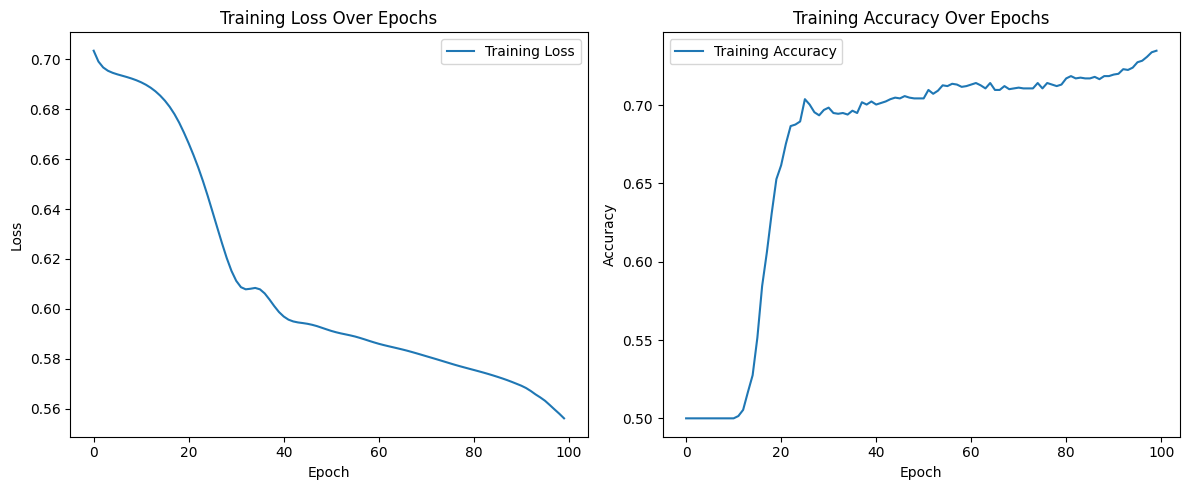

In [ ]:
import networkx as nx
import torch
import torch.nn.functional as F
from torch_geometric.nn import SAGEConv, GATConv
from torch_geometric.utils import from_networkx, negative_sampling
from torch.nn import Linear
from torch.optim.lr_scheduler import ReduceLROnPlateau
import matplotlib.pyplot as plt
import random
import numpy as np
from torch_geometric.data import Data

# Set random seeds for reproducibility
torch.manual_seed(42)
random.seed(42)
np.random.seed(42)

# Assuming you have a NetworkX graph named 'M'
# Step 1: Ensure all nodes have the same attributes
node_attributes = set()
for _, attributes in M.nodes(data=True):
    node_attributes.update(attributes.keys())

default_value = 0
for node in M.nodes:
    for attr in node_attributes:
        if attr not in M.nodes[node]:
            M.nodes[node][attr] = default_value

# Step 2: Convert NetworkX Graph 'M' to PyTorch Geometric Data
data = from_networkx(M)

# Ensure node features are included
if 'feature' in data:
    data.x = torch.tensor(data.feature, dtype=torch.float)
else:
    # Create random node features if none exist
    num_nodes = data.num_nodes
    num_features = len(node_attributes) if len(node_attributes) > 0 else 1
    data.x = torch.randn(num_nodes, num_features)

# Step 3: Extract the number of nodes, features, and edge_index from the converted data
num_nodes = data.num_nodes
num_features = data.x.shape[1] if data.x is not None else 1
edge_index = data.edge_index

# Step 4: Create Data object for the GNN model
G = Data(x=data.x, edge_index=edge_index)

# Combined Graph Model with Dense Layer and Early Stopping
class CombinedGraphModel(torch.nn.Module):
    def __init__(self, in_feats, hidden_feats, out_feats, num_heads):
        super(CombinedGraphModel, self).__init__()
        self.sage_conv1 = SAGEConv(in_feats, hidden_feats)
        self.gat_conv1 = GATConv(hidden_feats, hidden_feats, heads=num_heads, concat=True)
        self.sage_conv2 = SAGEConv(hidden_feats * num_heads, hidden_feats)
        self.gat_conv2 = GATConv(hidden_feats, out_feats, heads=1, concat=False)
        self.dense = Linear(out_feats, out_feats)  # Dense layer

    def forward(self, data):
        h_sage1 = F.relu(self.sage_conv1(data.x, data.edge_index))
        h_gat1 = F.relu(self.gat_conv1(h_sage1, data.edge_index))
        h_sage2 = F.relu(self.sage_conv2(h_gat1, data.edge_index))
        h_gat2 = self.gat_conv2(h_sage2, data.edge_index)
        h_dense = self.dense(h_gat2)  # Pass through dense layer
        return h_dense, h_sage1, h_gat1, h_sage2

# Training Function with Early Stopping
def train_combined_model(model, G, edge_index, negative_edge_index, loss_history, accuracy_history, num_epochs=100, patience=10, model_name="Combined Model"):
    optimizer = torch.optim.Adam(model.parameters(), lr=0.002)
    scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=5, verbose=True)
    best_loss = float('inf')
    patience_counter = 0

    for epoch in range(num_epochs):
        model.train()
        logits, _, _, _ = model(G)

        pos_edge_logits = (logits[edge_index[0]] * logits[edge_index[1]]).sum(dim=-1)
        neg_edge_logits = (logits[negative_edge_index[0]] * logits[negative_edge_index[1]]).sum(dim=-1)

        labels = torch.cat([
            torch.ones(edge_index.shape[1], device=pos_edge_logits.device),
            torch.zeros(negative_edge_index.shape[1], device=neg_edge_logits.device)
        ])

        edge_logits = torch.cat([pos_edge_logits, neg_edge_logits], dim=0)
        loss = F.binary_cross_entropy_with_logits(edge_logits, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        scheduler.step(loss)

        predictions = torch.sigmoid(edge_logits) > 0.5
        accuracy = (predictions == labels).sum().item() / labels.numel()

        loss_history.append(loss.item())
        accuracy_history.append(accuracy)

        if (epoch + 1) % 10 == 0:
            print(f'{model_name} Epoch {epoch + 1}, Loss: {loss.item():.4f}, Accuracy: {accuracy:.4f}')

        # Early stopping
        if loss.item() < best_loss:
            best_loss = loss.item()
            patience_counter = 0
        else:
            patience_counter += 1

        if patience_counter >= patience:
            print(f"Early stopping at epoch {epoch + 1}")
            break

# Initialize models
in_feats = G.x.shape[1]
hidden_feats = 16
out_feats = 8
num_heads = 4

combined_model = CombinedGraphModel(in_feats, hidden_feats, out_feats, num_heads)

# Generate negative samples using PyTorch Geometric's negative_sampling
negative_edge_index = negative_sampling(
    edge_index=edge_index,
    num_nodes=G.num_nodes,
    num_neg_samples=edge_index.shape[1],
    method='sparse'
)

# Train Combined Model
loss_history_combined = []
accuracy_history_combined = []
print("Training Combined GraphSAGE and GAT Model with Dense Layer and Early Stopping...")
train_combined_model(combined_model, G, edge_index, negative_edge_index, loss_history_combined, accuracy_history_combined, model_name="Combined Model")

# Plot Loss and Accuracy
plt.figure(figsize=(12, 5))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(loss_history_combined, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.legend()

# Accuracy plot
plt.subplot(1, 2, 2)
plt.plot(accuracy_history_combined, label='Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training Accuracy Over Epochs')
plt.legend()

plt.tight_layout()
plt.show()


### Embedding Viz

In [ ]:
# Save the trained model
torch.save(combined_model.state_dict(), 'combined_model.pth')
print("Model saved to 'combined_model.pth'.")

# Save the graph data
torch.save(G, 'graph_data.pth')
print("Graph data saved to 'graph_data.pth'.")


Model saved to 'combined_model.pth'.
Graph data saved to 'graph_data.pth'.


# inference

### Link Prediction Inference

In [ ]:
data = from_networkx(M)

In [ ]:
import torch
import torch.nn.functional as F
from torch_geometric.utils import negative_sampling

# Function to ensure all nodes have features and define features if missing
def ensure_node_features(G):
    if G.x is None:
        print("Node features missing, initializing random features.")
        num_nodes = G.num_nodes
        num_features = 6  # Assuming there are 6 features per node based on your graph data
        G.x = torch.randn(num_nodes, num_features)
    else:
        print("Node features found.")

# Function to infer link prediction
def infer_link_prediction(model, G, edge_index, num_negative_samples=None):
    # Ensure node features are properly defined
    ensure_node_features(G)

    model.eval()
    with torch.no_grad():
        # Step 1: Forward pass through the model to get the node embeddings
        logits, _, _, _ = model(G)

        # Step 2: Generate negative samples if not provided
        if num_negative_samples is None:
            num_negative_samples = edge_index.shape[1]
        negative_edge_index = negative_sampling(
            edge_index=edge_index,
            num_nodes=G.num_nodes,
            num_neg_samples=num_negative_samples,
            method='sparse'
        )

        # Step 3: Calculate logits for positive and negative edge pairs
        pos_edge_logits = (logits[edge_index[0]] * logits[edge_index[1]]).sum(dim=-1)
        neg_edge_logits = (logits[negative_edge_index[0]] * logits[negative_edge_index[1]]).sum(dim=-1)

        # Step 4: Compute probabilities for edge existence using sigmoid
        pos_probs = torch.sigmoid(pos_edge_logits)
        neg_probs = torch.sigmoid(neg_edge_logits)

        # Step 5: Output predictions
        # Positive edges represent existing edges in the graph
        print("\nPredicted probabilities for positive edges:")
        for i, prob in enumerate(pos_probs):
            print(f"Edge {edge_index[0, i].item()} <-> {edge_index[1, i].item()}: {prob.item():.4f}")

        # Negative edges represent non-existing (or sampled) edges
        print("\nPredicted probabilities for negative (sampled) edges:")
        for i, prob in enumerate(neg_probs):
            print(f"Edge {negative_edge_index[0, i].item()} <-> {negative_edge_index[1, i].item()}: {prob.item():.4f}")

# Initialize models with corrected feature size
in_feats = 6  # Must match the number of features in the node features (`G.x`)
hidden_feats = 16
out_feats = 8
num_heads = 4

# Initialize the combined model
combined_model = CombinedGraphModel(in_feats, hidden_feats, out_feats, num_heads)

# Run inference for link prediction
print("\n--- Link Prediction Inference ---")
infer_link_prediction(combined_model, data, data.edge_index)



--- Link Prediction Inference ---
Node features missing, initializing random features.

Predicted probabilities for positive edges:
Edge 0 <-> 129: 0.5348
Edge 0 <-> 50: 0.5350
Edge 0 <-> 51: 0.5351
Edge 0 <-> 21: 0.5344
Edge 0 <-> 155: 0.5343
Edge 0 <-> 175: 0.5365
Edge 0 <-> 185: 0.5367
Edge 0 <-> 48: 0.5368
Edge 0 <-> 99: 0.5357
Edge 1 <-> 23: 0.5300
Edge 1 <-> 15: 0.5311
Edge 1 <-> 1: 0.5310
Edge 1 <-> 37: 0.5305
Edge 1 <-> 178: 0.5311
Edge 1 <-> 38: 0.5318
Edge 1 <-> 187: 0.5306
Edge 2 <-> 84: 0.5339
Edge 2 <-> 172: 0.5339
Edge 2 <-> 180: 0.5344
Edge 3 <-> 35: 0.5291
Edge 3 <-> 56: 0.5308
Edge 3 <-> 137: 0.5290
Edge 3 <-> 3: 0.5297
Edge 3 <-> 37: 0.5298
Edge 4 <-> 129: 0.5327
Edge 4 <-> 50: 0.5328
Edge 4 <-> 96: 0.5320
Edge 4 <-> 143: 0.5321
Edge 4 <-> 7: 0.5310
Edge 4 <-> 109: 0.5311
Edge 4 <-> 52: 0.5317
Edge 5 <-> 23: 0.5297
Edge 5 <-> 83: 0.5314
Edge 6 <-> 115: 0.5302
Edge 6 <-> 81: 0.5311
Edge 7 <-> 4: 0.5310
Edge 7 <-> 109: 0.5304
Edge 7 <-> 52: 0.5309
Edge 7 <-> 45: 0.5302

### Node Generation Inference

In [ ]:
from transformers import AutoTokenizer, AutoModel
import torch
import torch.nn.functional as F
from torch import nn

# Load the pre-trained all-mpnet-base-v2 model and tokenizer from Hugging Face
model_name = "sentence-transformers/all-mpnet-base-v2"
tokenizer = AutoTokenizer.from_pretrained(model_name)
mpnet_model = AutoModel.from_pretrained(model_name)

# Define the function for query-based node inference
def find_similar_nodes(query, k, G, data, combined_model):
    # Step 1: Embed the query using the mpnet model
    def embed_query_mpnet(query):
        # Tokenize and create input tensor for mpnet model
        inputs = tokenizer(query, return_tensors='pt', truncation=True, padding=True)
        with torch.no_grad():
            outputs = mpnet_model(**inputs)

        # Use the last hidden state to get the embeddings (average over all tokens)
        query_embedding = outputs.last_hidden_state.mean(dim=1)
        return query_embedding

    # Embed the query
    query_embedding = embed_query_mpnet(query)

    # Step 2: Reduce the dimensionality of the query embedding from 768 to 8 using a Linear layer
    target_dim = 8  # Target dimension to match node embeddings
    linear_layer = nn.Linear(query_embedding.shape[1], target_dim)

    # Apply the linear layer to reduce the dimensionality
    query_embedding_reduced = linear_layer(query_embedding)

    # Normalize the reduced embedding to unit length
    query_embedding_reduced = F.normalize(query_embedding_reduced, p=2, dim=1)

    # Step 3: Extract node embeddings from the trained model (assuming `combined_model` is already trained)
    combined_model.eval()
    with torch.no_grad():
        node_embeddings, _, _, _ = combined_model(data)

    # Step 4: Normalize node embeddings for cosine similarity
    node_embeddings = F.normalize(node_embeddings, p=2, dim=1)

    # Step 5: Calculate cosine similarity between query and each node
    cos_similarities = F.cosine_similarity(query_embedding_reduced, node_embeddings)

    # Step 6: Find the `k` most similar nodes, skipping nodes with all '0' values except 'figure'
    top_k_indices = torch.topk(cos_similarities, k=len(cos_similarities)).indices  # Get all sorted indices first

    # Step 7: Create a mapping between NetworkX node IDs and PyTorch Geometric node indices
    node_mapping = {idx: node_id for idx, node_id in enumerate(G.nodes())}

    # Step 8: Filter out nodes with all attributes as '0' (except for 'figure') and print the top `k` nodes that meet the criteria
    valid_nodes = []
    for i in top_k_indices:
        node_idx = i.item()
        original_node_id = node_mapping[node_idx]  # Get the original NetworkX node ID
        similarity_score = cos_similarities[node_idx].item()

        # Extract attributes of the node from the original NetworkX graph `G`
        node_attributes = G.nodes[original_node_id]

        # Check if all attributes except 'figure' have values of zero
        if all(value == 0 for key, value in node_attributes.items() if key != 'figure'):
            continue  # Skip this node if all attributes (excluding 'figure') are '0'

        # Store the valid node information
        valid_nodes.append((original_node_id, node_idx, similarity_score, node_attributes))

        # Stop once we have the top `k` valid nodes
        if len(valid_nodes) >= k:
            break

    # Display the similarity score and the attributes of each valid node
    print(f"\nTop {k} nodes most similar to the query '{query}' :")
    for original_node_id, node_idx, similarity_score, node_attributes in valid_nodes:
        print(f"Node: {original_node_id} (Index: {node_idx}): Similarity Score = {similarity_score:.4f}")
        print(f"Node: {original_node_id} Attributes: {node_attributes}\n")


In [ ]:
G = M

In [ ]:
# t3ebna aaliha
query = "risk types"
k = 2

# Calling inference function li t3eb aaliha
find_similar_nodes(query, k, G, data, combined_model)

Top 2 nodes most similar to the query 'risk types':
Node: Risk Management Tools (Index: 170): Similarity Score = 0.9157
Node: Risk Management Tools Attributes: {'definition': 'Risk Register: A repository in which outputs of risk management processes are recorded.', 'keywords': ['Risk Management Tools']}

Node: Risk Opportunities Identification (Index: 49): Similarity Score = 0.9130
Node: Risk Opportunities Identification Attributes: {'definition': 'Opportunity: A risk that would have a positive effect on one or more project objectives.', 'keywords': ['Risk Opportunities']}


In [ ]:
print(output)

Analogous Estimating: A method for estimating the duration or cost of an activity or a project using  historical data from a similar activity or project.


# deployment

In [ ]:
from joblib import dump

In [ ]:
# Supposons que 'model' soit votre modèle entraîné
dump(data, 'data.pkl')


['data.pkl']

In [ ]:
# Save the model to a .pkl file
with open('combined_model.pkl', 'wb') as model_file:
    pickle.dump(G, model_file)
